In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### Считаем данные и выделим тестовую и обучающую выборки

In [10]:
data = pd.read_csv('./banana_quality.csv')
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [11]:
from sklearn.preprocessing import LabelEncoder
X = data.drop('Quality', axis=1)
y = data['Quality']#ключевое значени
label_encoder = LabelEncoder()
y = data['Quality'] = label_encoder.fit_transform(data['Quality'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучим модели логистической регрессии, SVM и дерева решений:

In [12]:
# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# SVM
svm = SVC()
svm.fit(X_train, y_train)

# Дерево решений
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Оценим качество моделей с помощью метрик accuracy и f1_score:

In [13]:
models = [log_reg, svm, dt]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print("\n")

Logistic Regression:
Accuracy: 0.879375
F1 Score: 0.8793495789410304


SVM:
Accuracy: 0.98125
F1 Score: 0.98125


Decision Tree:
Accuracy: 0.93875
F1 Score: 0.9387480847404626




### Построим график, показывающий важность признаков в дереве решений:

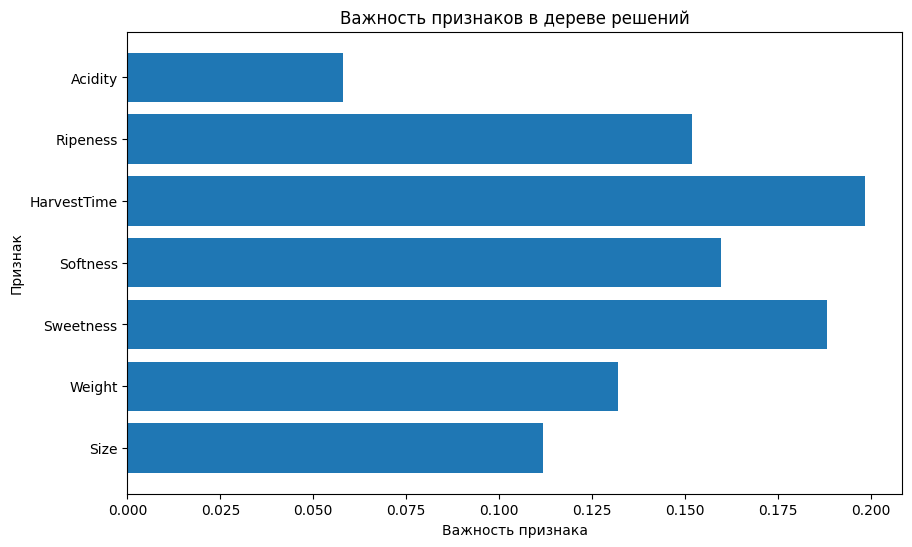

In [14]:
importances = dt.feature_importances_
features = ['Size','Weight',	'Sweetness',	'Softness',	'HarvestTime',	'Ripeness',	'Acidity']

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в дереве решений')
plt.show()

### Визуализация дерева

In [15]:
from sklearn.tree import export_graphviz
import graphviz



dot_data = export_graphviz(dt, out_file=None,
                           feature_names=features,
                           class_names=['Bad', 'Good'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


'decision_tree.pdf'

In [16]:
from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names=features)
print(tree_rules)


|--- Sweetness <= 0.61
|   |--- HarvestTime <= 0.58
|   |   |--- Ripeness <= 0.74
|   |   |   |--- Size <= 1.20
|   |   |   |   |--- Weight <= 2.07
|   |   |   |   |   |--- Ripeness <= -0.50
|   |   |   |   |   |   |--- Acidity <= -4.61
|   |   |   |   |   |   |   |--- Size <= -2.83
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Size >  -2.83
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Acidity >  -4.61
|   |   |   |   |   |   |   |--- Weight <= -6.26
|   |   |   |   |   |   |   |   |--- Weight <= -6.37
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Weight >  -6.37
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Weight >  -6.26
|   |   |   |   |   |   |   |   |--- Weight <= 1.79
|   |   |   |   |   |   |   |   |   |--- Softness <= 1.30
|   |   |   |   |   |   |   |   |   |   |--- Softness <= 1.29
|   |   |   |   |   |   |   |   |   |   |   |--- trunca